In [ ]:
# install.packages('e1071', repos='http://cran.us.r-project.org')
# install.packages('ROCR', repos='http://cran.us.r-project.org')
# install.packages('lowess', repos='http://cran.us.r-project.org')

**Support vector classifier**

Create a data set which is not linearly separable.

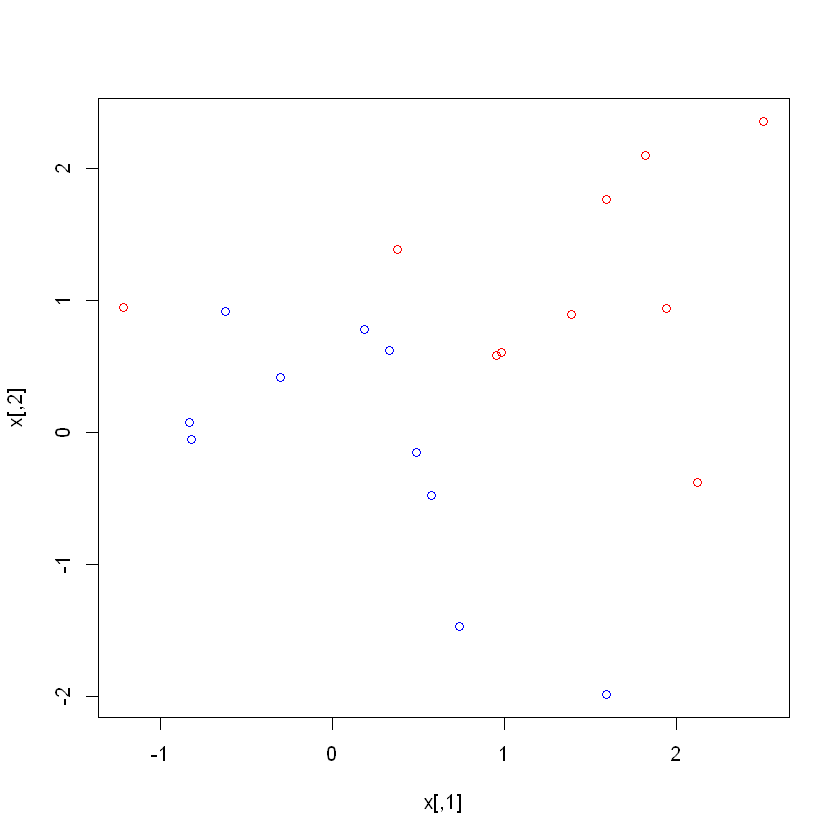

In [41]:
set.seed(1)
x=matrix(rnorm(20*2), ncol=2)    # rnorm creates normally distributed variables (here: 40 variables in 20 x 2 matrix)
y=c(rep(-1,10), rep(1,10))   # create y-targets for first and second column
x[y==1,]=x[y==1,] + 1    # add +1 to those points with class 1
plot(x, col=(3-y))

In [42]:
dat=data.frame(x=x, y=as.factor(y))  # encode response as a factor variable to do classification (otherwise it does regression)
library(e1071)
svmfit=svm(y~., data=dat, kernel="linear", cost=10,scale=FALSE)

Support vectores are crosses

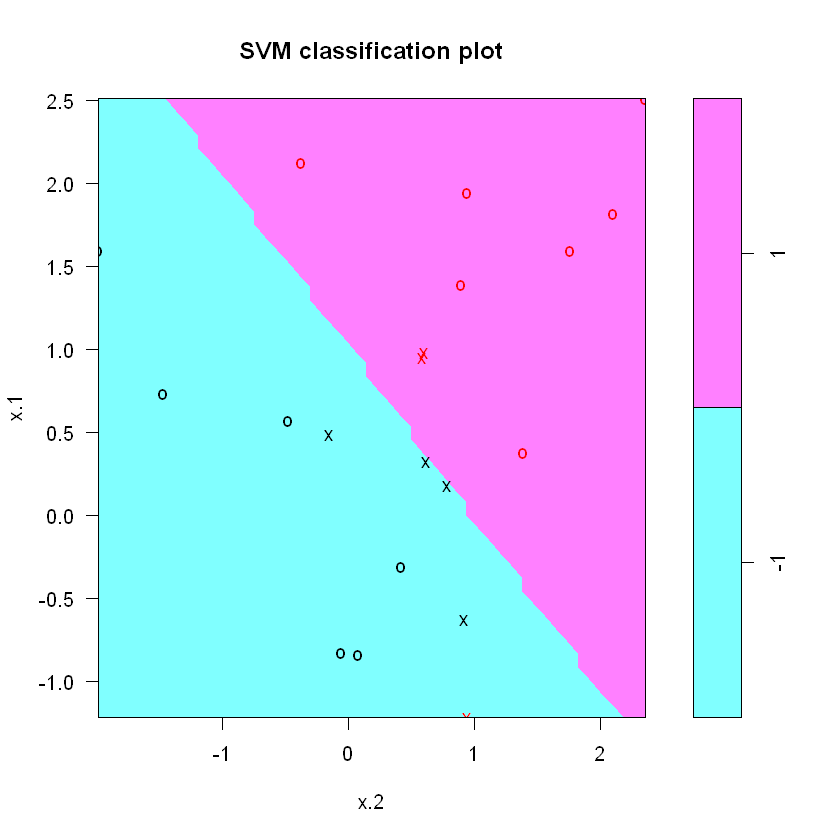

In [43]:
plot(svmfit, dat)

In [44]:
svmfit$index  # gives the indices of the support vectors

[1]  1  2  5  7 14 16 17

In [46]:
summary(svmfit)   # note: gamma is not relevant for linear kernal (= 1 / dim(data))


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




Note that $C$ is different from the one in the book. Here, smaller $C$ means more room for error.

[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20

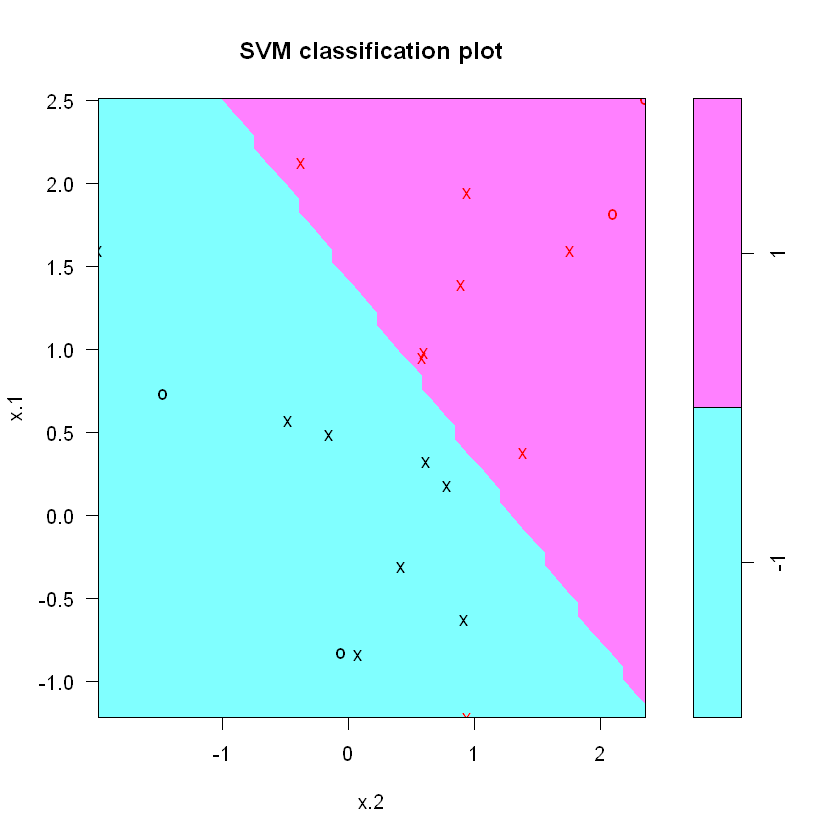

In [47]:
svmfit=svm(y~., data=dat, kernel="linear", cost=0.1, scale=FALSE)
plot(svmfit, dat)
svmfit$index

Perform cross-validation for different $C$ values.

In [48]:
set.seed(1)
tune.out=tune(svm,y~.,data=dat,kernel="linear",ranges=list(cost=c(0.001, 0.01, 0.1, 1,5,10,100)))

In [49]:
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.70  0.4216370
2 1e-02  0.70  0.4216370
3 1e-01  0.10  0.2108185
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229


In [50]:
bestmod=tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




Create test data set with same properties as training data set

In [51]:
xtest=matrix(rnorm(20*2), ncol=2)
ytest=sample(c(-1,1), 20, rep=TRUE)
xtest[ytest==1,]=xtest[ytest==1,] + 1
testdat=data.frame(x=xtest, y=as.factor(ytest))

In [52]:
ypred=predict(bestmod,testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 11  1
     1   0  8

In [53]:
svmfit=svm(y~., data=dat, kernel="linear", cost=.01,scale=FALSE)
ypred=predict(svmfit,testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 11  2
     1   0  7

Using a suboptimal cost parameter leads to one more incorrect classification.

Now create a data set where the classes are linearly separable.

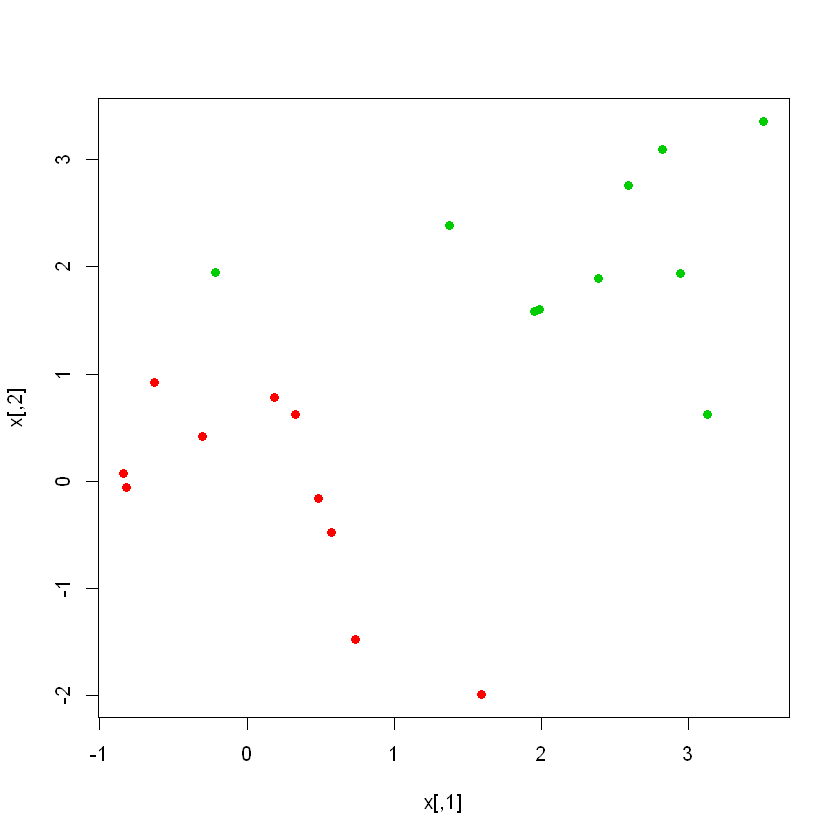

In [57]:
x[y==1,]=x[y==1,]+0.5
plot(x, col=(y+5)/2, pch=19)

In [55]:
dat=data.frame(x=x,y=as.factor(y))
svmfit=svm(y~., data=dat, kernel="linear", cost=1e5)
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 
      gamma:  0.5 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




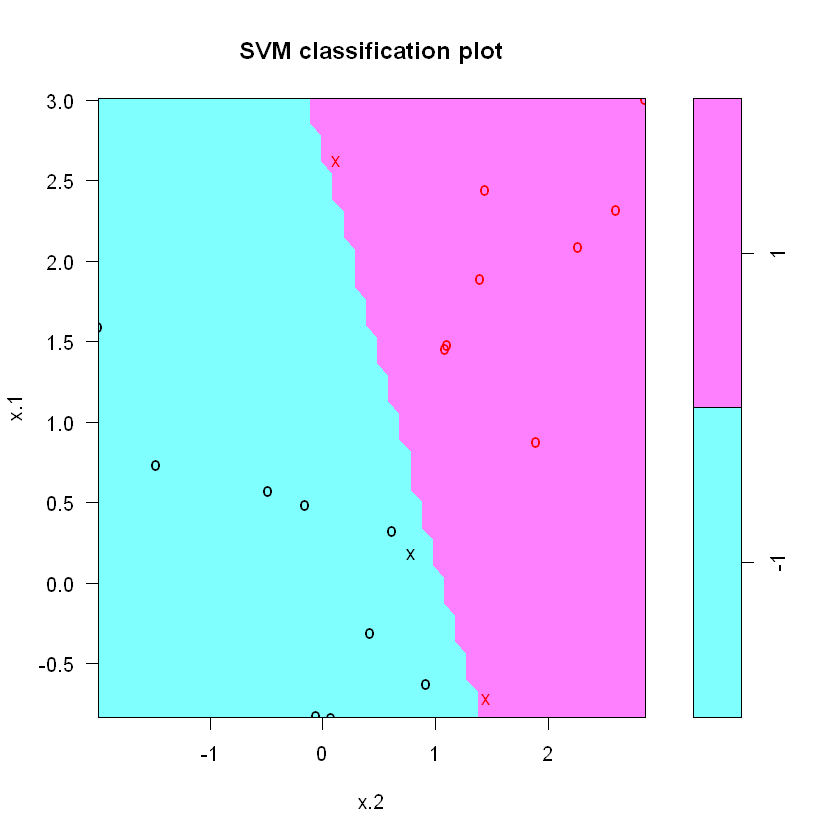

In [58]:
plot(svmfit, dat)

No errors were made. Nevertheless, we can choose to have a bigger margin to avoid overfitting


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




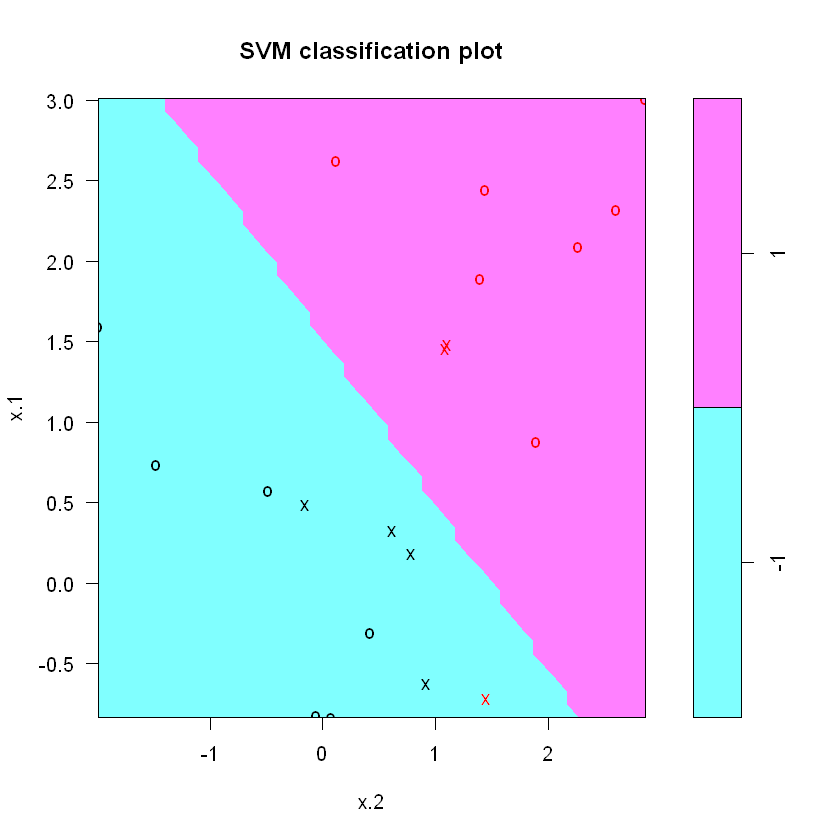

In [59]:
svmfit=svm(y~., data=dat, kernel="linear", cost=1)
summary(svmfit)
plot(svmfit,dat)

**Support vector machine**

Generate data with non-linear decision boundary, by combining three Gaussian distributions.

In [60]:
set.seed(1)
x=matrix(rnorm(200*2), ncol=2)
x[1:100,]=x[1:100,]+2
x[101:150,]=x[101:150,]-2
y=c(rep(1,150),rep(2,50))
dat=data.frame(x=x,y=as.factor(y))

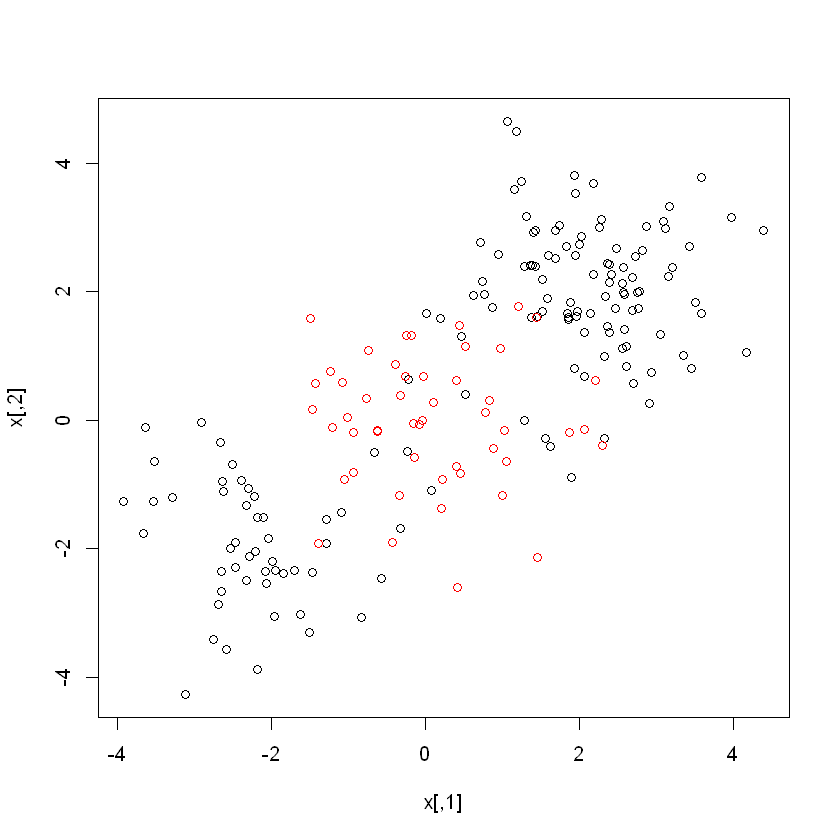

In [61]:
plot(x, col=y)

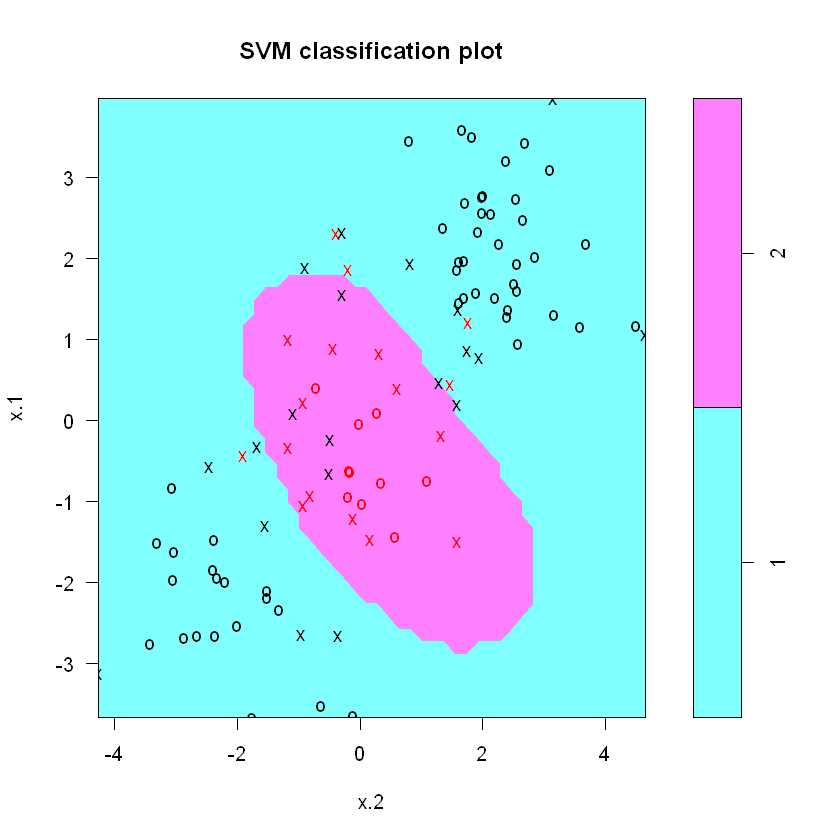

In [62]:
train=sample(200,100)
svmfit=svm(y~., data=dat[train,], kernel="radial",  gamma=1, cost=1)
plot(svmfit, dat[train,])

In [63]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  37

 ( 17 20 )


Number of Classes:  2 

Levels: 
 1 2




Increasing the cost decreases the training error. However, it will probably lead to overfitting

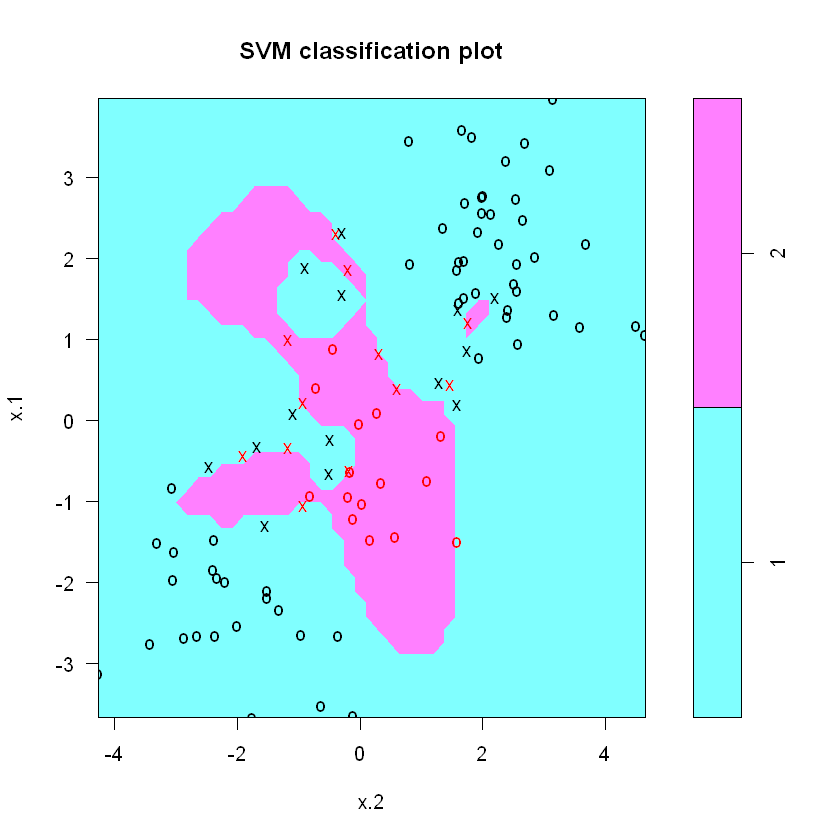

In [64]:
svmfit=svm(y~., data=dat[train,], kernel="radial",gamma=1,cost=1e5)
plot(svmfit,dat[train,])

In [65]:
set.seed(1)  # cross-validation to find optimal cost and gamma
tune.out=tune(svm, y~., data=dat[train,], kernel="radial", ranges=list(cost=c(0.1,1,10,100,1000),gamma=c(0.5,1,2,3,4)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     2

- best performance: 0.12 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.27 0.11595018
2  1e+00   0.5  0.13 0.08232726
3  1e+01   0.5  0.15 0.07071068
4  1e+02   0.5  0.17 0.08232726
5  1e+03   0.5  0.21 0.09944289
6  1e-01   1.0  0.25 0.13540064
7  1e+00   1.0  0.13 0.08232726
8  1e+01   1.0  0.16 0.06992059
9  1e+02   1.0  0.20 0.09428090
10 1e+03   1.0  0.20 0.08164966
11 1e-01   2.0  0.25 0.12692955
12 1e+00   2.0  0.12 0.09189366
13 1e+01   2.0  0.17 0.09486833
14 1e+02   2.0  0.19 0.09944289
15 1e+03   2.0  0.20 0.09428090
16 1e-01   3.0  0.27 0.11595018
17 1e+00   3.0  0.13 0.09486833
18 1e+01   3.0  0.18 0.10327956
19 1e+02   3.0  0.21 0.08755950
20 1e+03   3.0  0.22 0.10327956
21 1e-01   4.0  0.27 0.11595018
22 1e+00   4.0  0.15 0.10801234
23 1e+01   4.0  0.18 0.11352924
24 1e+02   4.0  0.21 0.08755950
25 1e+03   4.0  0.24 0

In [66]:
table(true=dat[-train,"y"], pred=predict(tune.out$best.model,newdata=dat[-train,]))

    pred
true  1  2
   1 74  3
   2  7 16

**ROC curves**

Write a short function to plot ROC curves.

In [67]:
library(ROCR)
rocplot=function(pred, truth, ...){
   predob = prediction(pred, truth)
   perf = performance(predob, "tpr", "fpr")
   plot(perf,...)}

In [68]:
svmfit.opt=svm(y~., data=dat[train,], kernel="radial",gamma=2, cost=1,decision.values=T)
fitted=attributes(predict(svmfit.opt,dat[train,],decision.values=TRUE))$decision.values

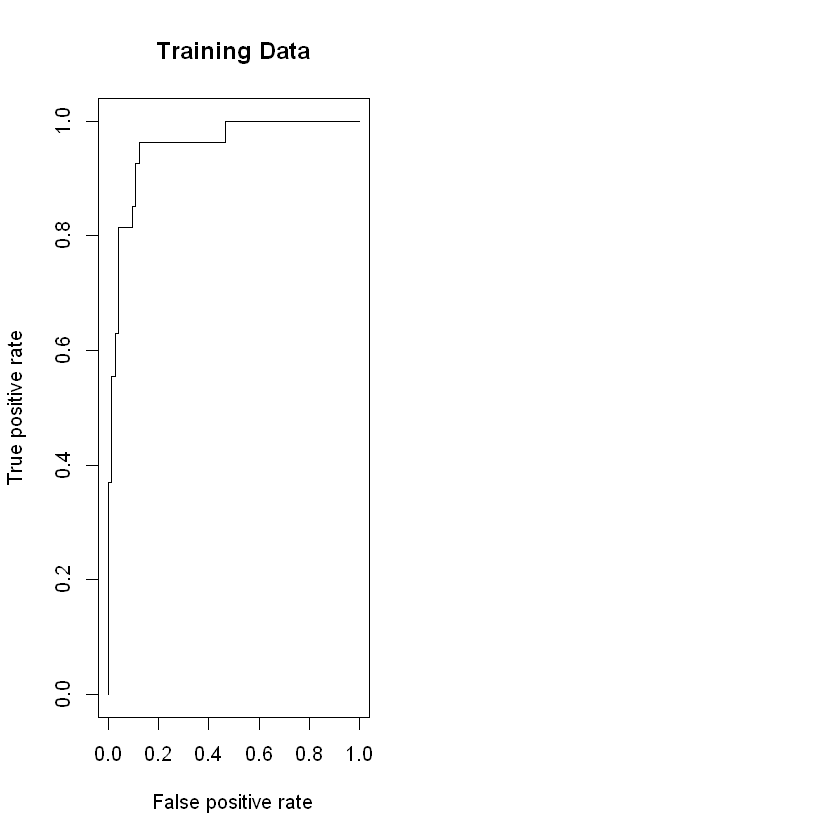

In [69]:
par(mfrow=c(1,2))
rocplot(fitted,dat[train,"y"],main="Training Data")

By increasing $\gamma$ we get a more flexible fit

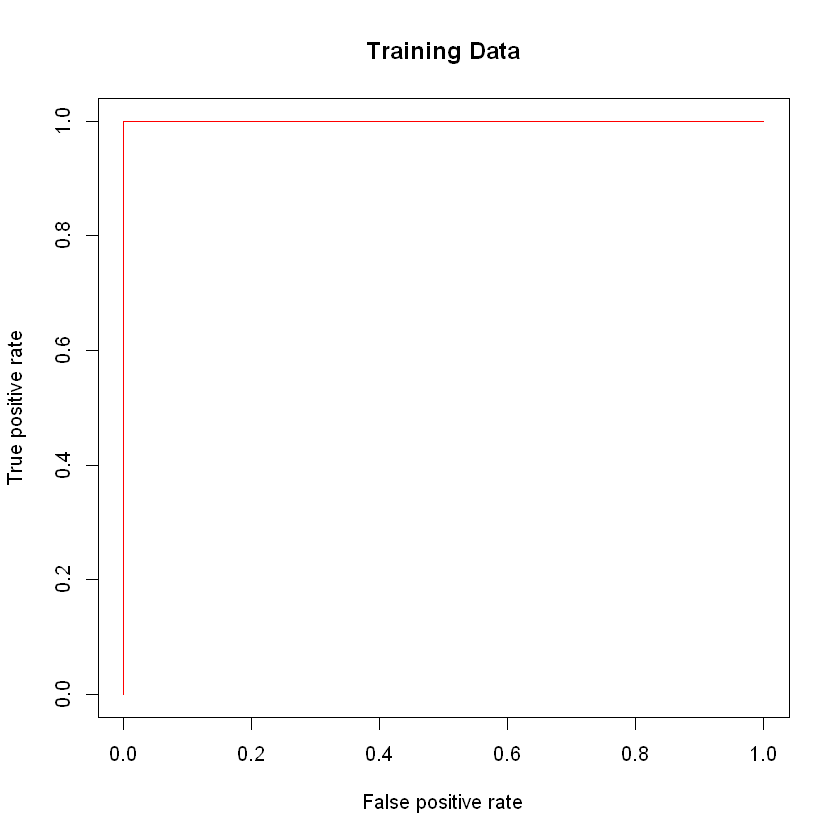

In [76]:
svmfit.flex=svm(y~., data=dat[train,], kernel="radial", gamma=50, cost=1, decision.values=T)
fitted=attributes(predict(svmfit.flex,dat[train,],decision.values=T))$decision.values
rocplot(fitted,dat[train,"y"],main="Training Data")
rocplot(fitted,dat[train,"y"],add=T,col="red")

However, we see we have made an overfit on the test data

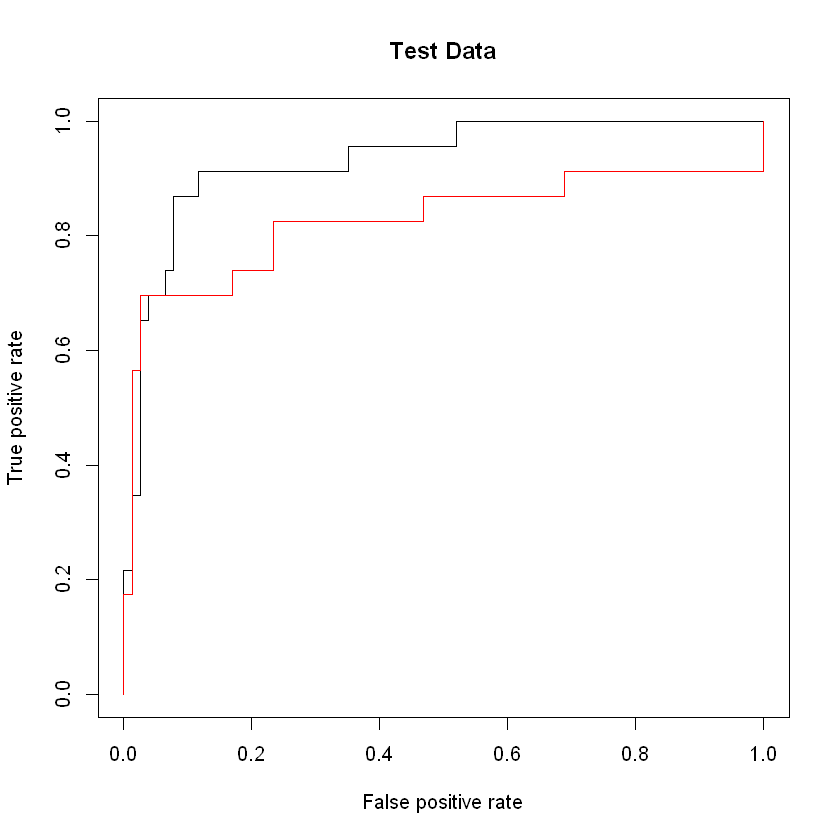

In [75]:
fitted=attributes(predict(svmfit.opt,dat[-train,],decision.values=T))$decision.values
rocplot(fitted,dat[-train,"y"],main="Test Data")
fitted=attributes(predict(svmfit.flex,dat[-train,],decision.values=T))$decision.values
rocplot(fitted,dat[-train,"y"],add=T,col="red")

**SVM with multiple classes**

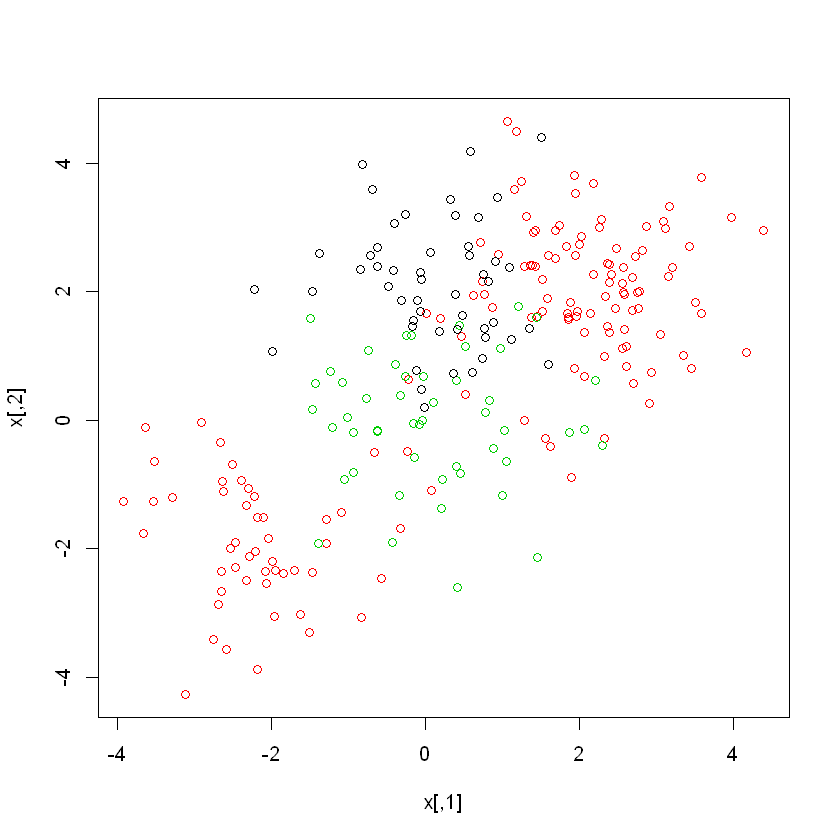

In [77]:
set.seed(1)
x=rbind(x, matrix(rnorm(50*2), ncol=2))
y=c(y, rep(0,50))
x[y==0,2]=x[y==0,2]+2
dat=data.frame(x=x, y=as.factor(y))
par(mfrow=c(1,1))
plot(x,col=(y+1))

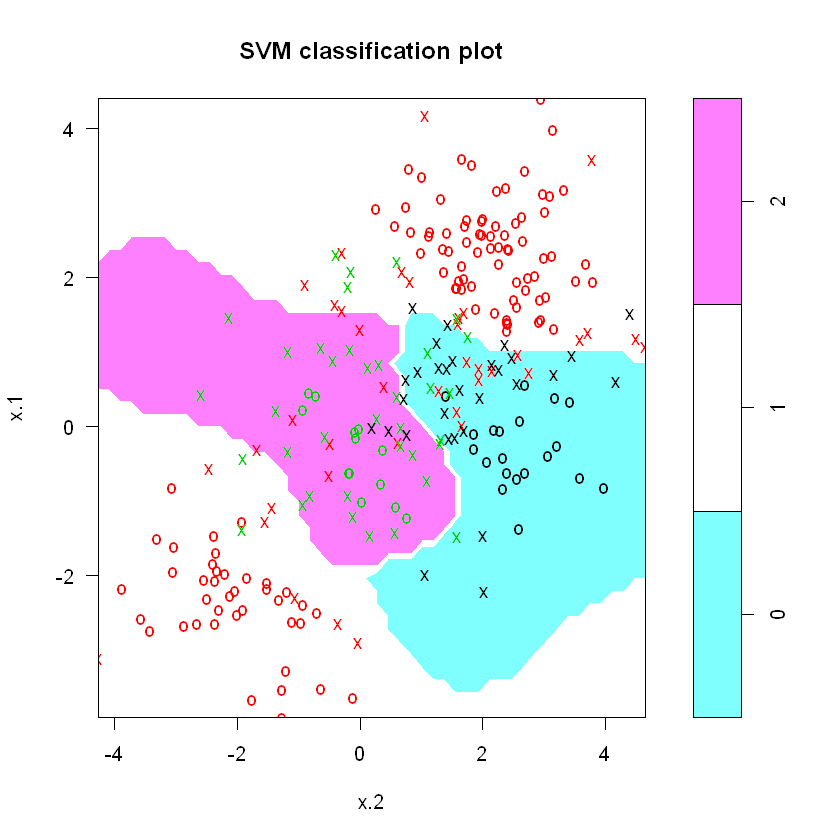

In [78]:
svmfit=svm(y~., data=dat, kernel="radial", cost=10, gamma=1)
plot(svmfit, dat)

**Application to Gene Expression Data**

In [79]:
library(ISLR)
names(Khan)
dim(Khan$xtrain)
dim(Khan$xtest)
length(Khan$ytrain)
length(Khan$ytest)

Warning message:
"package 'ISLR' was built under R version 3.5.3"

[1] "xtrain" "xtest"  "ytrain" "ytest"

[1]   63 2308

[1]   20 2308

[1] 63

[1] 20

In [80]:
table(Khan$ytrain)
table(Khan$ytest)


 1  2  3  4 
 8 23 12 20 


1 2 3 4 
3 6 6 5 

In [81]:
dat=data.frame(x=Khan$xtrain, y=as.factor(Khan$ytrain))
out=svm(y~., data=dat, kernel="linear",cost=10)
summary(out)
table(out$fitted, dat$y)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.0004332756 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




   
     1  2  3  4
  1  8  0  0  0
  2  0 23  0  0
  3  0  0 12  0
  4  0  0  0 20

In [82]:
dat.te=data.frame(x=Khan$xtest, y=as.factor(Khan$ytest))
pred.te=predict(out, newdata=dat.te)
table(pred.te, dat.te$y)

       
pred.te 1 2 3 4
      1 3 0 0 0
      2 0 6 2 0
      3 0 0 4 0
      4 0 0 0 5